1.What are Type I and Type II errors in hypothesis testing, and how do they
impact decision-making?

- In hypothesis testing, a Type I error occurs when you reject a true null hypothesis (a "false positive")
- Type II error happens when you fail to reject a false null hypothesis (a "false negative").
- Both errors affect decision-making by either leading to incorrect conclusions about an effect that doesn’t exist or missing an effect that actually does exist.
- Type I error = false alarm (seeing an effect that isn’t there).
- Type II error = missed detection (failing to see a real effect).





2.What is the P-value in hypothesis testing, and how should it be interpreted
in the context of the null hypothesis?


Definition of P-value
- The p-value is the probability, under the assumption that the null hypothesis (H₀) is true, of obtaining a test statistic at least as extreme as the one observed.

- Small p-value (≤ α): Evidence against H₀. Suggests the observed data is unlikely under H₀, so we reject H₀.
- Large p-value (> α): Evidence consistent with H₀. Suggests the observed data could plausibly occur under H₀, so we fail to reject H₀.

- The p-value does not tell us:
  - The probability that H₀ is true.
  - The probability that H₁ is true.
  - Instead, it measures how compatible the observed data is with the assumption that H₀ is true.


3.Explain the difference between a Z-test and a T-test, including when to use
each

-  Z-test
    - Definition: A statistical test based on the standard normal distribution (Z-distribution).
    - Conditions for use:
      - Population variance (σ²) is known.
      - Sample size is large (usually n\geq 30).
   - Applications:
      - Comparing a sample mean to a population mean.
      - Comparing means of two large samples.

-  T-test
   - Definition: A statistical test based on the Student’s t-distribution.
   - Conditions for use:
     - Population variance (σ²) is unknown.
     - Sample size is small (n<30).
    - Applications:
       - Comparing a sample mean to a population mean when σ² is unknown.
       - Comparing means of two small samples.
       - Paired sample tests (before-and-after studies).

4.What is a confidence interval, and how does the margin of error influence
its width and interpretation?

-  A confidence interval (CI) is a range of values, derived from sample data, that is likely to contain the true population parameter
   -  For example, if the average test score is 75 with a margin of error of 5, the 95% confidence interval would be 70 to 80.
- Margin of Error:
   - The margin of error (MOE) is the amount added and subtracted from the sample estimate to create the interval. It directly affects the width and interpretation of the CI
   - Width of the Interval:
     - Larger margin of error - wider interval -less precision.
     - Smaller margin of error - narrower interval - more precision.
   - Interpretation:
     - A wide interval suggests more uncertainty about the true value.
     - A narrow interval suggests greater confidence in the estimate’s accuracy.

Imagine a survey estimating that 60% of voters support a policy, with a margin of error of ±3% at 95% confidence:
- Confidence interval = 57% to 63%
- Interpretation: We are 95% confident the true proportion of supporters lies between 57% and 63%.
- If the margin of error were ±6%, the interval would widen to 54% to 66%, making the estimate less precise.


5.Describe the purpose and assumptions of an ANOVA test. How does it
extend hypothesis testing to more than two groups?


- ANOVA (Analysis of Variance) is a statistical method used to compare the means of three or more groups simultaneously.
- Instead of running multiple t-tests (which increases the risk of Type I error), ANOVA provides a single test to evaluate whether at least one group mean differs from the other
ANOVA Extends Hypothesis Testing
- Two-group case: A t-test compares the means of two groups.
- More than two groups: ANOVA generalizes this by partitioning the total variability in the data into:
- Between-group variance (differences among group means)
- Within-group variance (variability inside each group)
- The F-statistic is computed as:
F=between group variance/with in group variace
- Hypotheses:
- Null hypothesis (H_0): All group means are equal.
- Alternative hypothesis (H_a): At least one group mean differs.
- If the F-statistic is large enough (p-value < significance level), we reject H_0.
- Example
Suppose you want to test whether three diets lead to different average weight loss:
  - t-tests would require comparing Diet A vs B, A vs C, and B vs C separately (3 tests, higher error risk).


In [2]:
'''6.Write a Python program to perform a one-sample Z-test and interpret the
result for a given dataset'''

import numpy as np
from scipy.stats import norm

# Example dataset (sample data)
data = [12, 15, 14, 10, 13, 17, 14, 16, 15, 14]

# Known population parameters
population_mean = 13   # Hypothesized mean (H0)
population_std = 2     # Known population standard deviation

# Step 1: Calculate sample statistics
sample_mean = np.mean(data)
n = len(data)

# Step 2: Compute Z statistic
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))

# Step 3: Compute p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Step 4: Set significance level
alpha = 0.05

# Step 5: Interpret result
print("Sample Mean:", sample_mean)
print("Z-Score:", z_score)
print("P-Value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between sample mean and population mean.")

Sample Mean: 14.0
Z-Score: 1.5811388300841895
P-Value: 0.11384629800665813
Fail to reject the null hypothesis: No significant difference between sample mean and population mean.


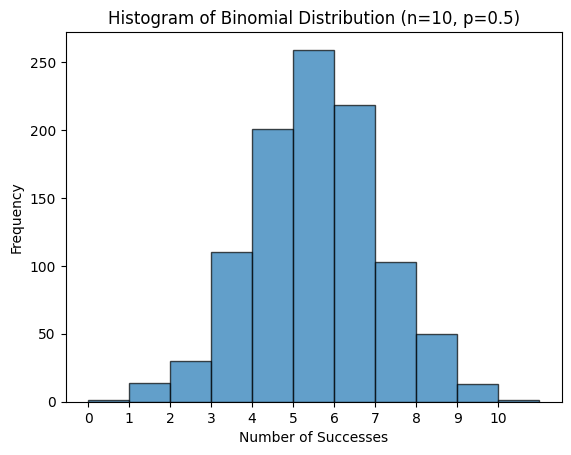

In [3]:
'''
7.Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using
NumPy and plot the histogram
'''
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10       # number of trials
p = 0.5      # probability of success
size = 1000  # number of samples

# Simulate dataset
data = np.random.binomial(n, p, size)

# Plot histogram
plt.hist(data, bins=range(n+2), edgecolor='black', alpha=0.7)
plt.title("Histogram of Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.xticks(range(n+1))
plt.show()

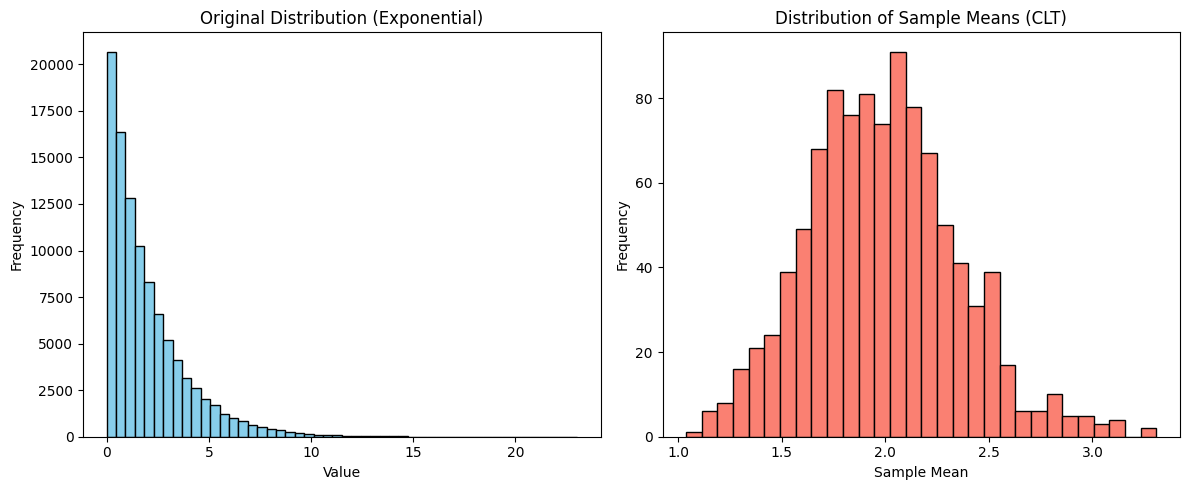

In [4]:
'''
8.Generate multiple samples from a non-normal distribution and implement
the Central Limit Theorem using Python
'''

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate data from a non-normal distribution (Exponential)
population_data = np.random.exponential(scale=2.0, size=100000)

# Step 2: Draw multiple samples and compute sample means
sample_size = 30       # number of observations per sample
num_samples = 1000     # number of samples

sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population_data, sample_size)
    sample_means.append(np.mean(sample))

# Step 3: Plot histograms
plt.figure(figsize=(12,5))

# Histogram of original non-normal population
plt.subplot(1,2,1)
plt.hist(population_data, bins=50, color='skyblue', edgecolor='black')
plt.title("Original Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Histogram of sample means (CLT result)
plt.subplot(1,2,2)
plt.hist(sample_means, bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of Sample Means (CLT)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Sample Mean = 49.265
95% Confidence Interval = (47.244, 51.286)


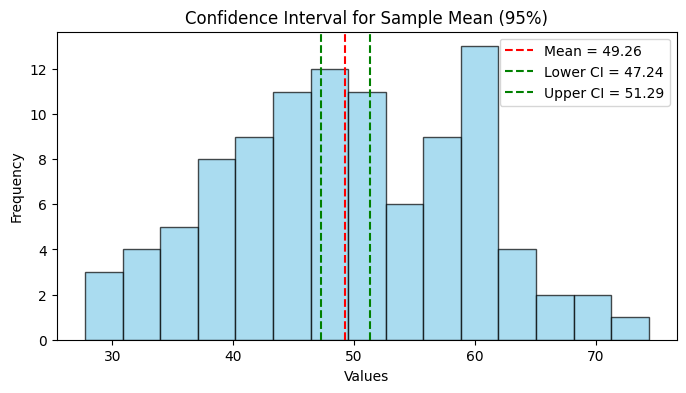

In [5]:
'''
9.Write a Python function to calculate and visualize the confidence interval
for a sample mean
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_confidence_interval(data, confidence=0.95):

    # Step 1: Compute sample statistics
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # sample standard deviation
    n = len(data)

    # Step 2: Standard error
    se = sample_std / np.sqrt(n)

    # Step 3: Critical value (t-distribution for small samples)
    t_crit = stats.t.ppf((1 + confidence) / 2, df=n-1)

    # Step 4: Confidence interval
    margin_of_error = t_crit * se
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error

    print(f"Sample Mean = {sample_mean:.3f}")
    print(f"{int(confidence*100)}% Confidence Interval = ({ci_lower:.3f}, {ci_upper:.3f})")

    # Step 5: Visualization
    plt.figure(figsize=(8,4))
    plt.hist(data, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(sample_mean, color='red', linestyle='--', label=f"Mean = {sample_mean:.2f}")
    plt.axvline(ci_lower, color='green', linestyle='--', label=f"Lower CI = {ci_lower:.2f}")
    plt.axvline(ci_upper, color='green', linestyle='--', label=f"Upper CI = {ci_upper:.2f}")
    plt.title(f"Confidence Interval for Sample Mean ({int(confidence*100)}%)")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Example usage:
data = np.random.normal(loc=50, scale=10, size=100)  # simulate dataset
plot_confidence_interval(data, confidence=0.95)

In [6]:
'''
10.Perform a Chi-square goodness-of-fit test using Python to compare
observed and expected distributions, and explain the outcome.
'''

import numpy as np
from scipy.stats import chisquare

# Step 1: Define observed and expected frequencies
# Example: Suppose we roll a die 60 times and record outcomes
observed = np.array([8, 10, 9, 12, 11, 10])   # observed counts
expected = np.array([10, 10, 10, 10, 10, 10]) # expected counts (fair die)

# Step 2: Perform Chi-square goodness-of-fit test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Step 3: Print results
print("Chi-square Statistic:", chi_stat)
print("P-value:", p_value)

# Step 4: Interpret outcome
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Observed distribution differs significantly from expected.")
else:
    print("Fail to reject the null hypothesis: No significant difference between observed and expected.")

Chi-square Statistic: 1.0
P-value: 0.9625657732472964
Fail to reject the null hypothesis: No significant difference between observed and expected.
